<img 
    style="position: absolute; 
           left: 60%; 
           top: 0; /* Added to ensure proper positioning */
           height: 500px; 
           width: 40%; /* Maintain the original width */
           object-fit: cover; /* Adjust if necessary */
           clip-path: inset(0px 50px 0px 50px round 10px);" 
    src= "../.github/public_html/fig/Major crack Width development.png"
/>
</figure>


<h1 style="width: 60%; color: #EC6842; font-size: 55pt;">
    <Strong>
        IJsselsteinseweg <br>FEA Study
    </Strong>
</h1>

<h2 id="Background"><B>
    Rationale for the project<a class="anchor-link" href="#Background">&#182;</a>
    </B>
</h2>
<p style="text-align: justify; width: 60%; font-weight: normal;">
     This studies case study is the building will also evaluate the capabilities of FEA for the assessment of unreinforced masonry structures undergoing subsidence. For this measure understanding and analysing the capabilities of a finite element analysis are a important part in the validation of the model and the presenting of results. This notebook illustrates some of the different tools built for the analysis of such models and its implementations in different analysis types. Due to the limitations of the analysis output characteristics from DIANA FEA not all components of these analysis are able to have been done algorithmically therefore, it is reccomended to read this modules README.MD notes in order to ensure the different requirements for these analysis are well implemented in your models. 
</p>

## <strong> X | Imports</strong>

In [1]:
from fea import analyse_models, setup_analysis

import numpy as np
import matplotlib.pyplot as plt

## <strong> 1 | Find Model parameters</strong>

In [2]:
walls = {
    'Wall 1':{"x": np.array([0, 0, 0]), "y": np.array([0, 3.5, 7]), "z": np.array([0, -72, -152]), 'phi': np.array([1/200,1/200]), 'height': 5250, 'thickness': 27,'area': 390600},
    'Wall 2':{"x": np.array([0, 4.5, 8.9]), "y": np.array([7, 7, 7]), "z": np.array([-152, -163, -188]),  'phi': np.array([1/33,1/50]), 'height': 5250, 'thickness': 27,'area': 464625},
    'Wall 3':{"x": np.array([8.9, 8.9]), "y": np.array([3.6, 7]), "z": np.array([-149, -188]), 'phi': np.array([0,0]), 'height': 5250, 'thickness': 27,'area': 166950},
    'Wall 4':{"x": np.array([8.9, 10.8]), "y": np.array([3.6, 3.6]), "z": np.array([-149,-138]), 'phi': np.array([0,0]), 'height': 2850, 'thickness': 27,'area': 49020},
    'Wall 5':{"x": np.array([10.8, 10.8]), "y": np.array([0, 3.6]), "z": np.array([-104, -138]), 'phi': np.array([1/77,1/67]), 'height': 2850, 'thickness': 27,'area': 96720},
    'Wall 6':{"x": np.array([0, 5.2, 6.4, 8.9, 10.8]), "y": np.array([0, 0, 0, 0, 0]), "z": np.array([0, -42, -55, -75, -104]), 'phi': np.array([1/100,1/100]), 'height': 5000, 'thickness': 27, 'area': 517980},
}

In [3]:
x = walls['Wall 2']['x']
z = walls['Wall 2']['z']
dz = z - z[0]

iter = find_iter(dz,max_rate=0.05)
iter

719.0

## <strong> 2 | Process runs</strong>

### <strong> 3.1 | Run analysis</strong>

In [2]:
# ------------------------------- TSRCM ------------------------------ #
analysis_info = {
    'Relative displacement': {
        'Node Nr': [22, 23]
    },
    'Mutual': {
        'Node Nr': [[22, 23], [22, 23]],
        'Reference': [['TDtY', 'TDtY'], ['TDtY', 'TDtX']]
    },
    'Crack width': {
        'EOI': [[177,178,179,435],
                [35, 166, 203, 387, 523, 684, 723, 867],
                [9, 206, 263, 612]],
    },
    'Damage level': { 
        'parameters': {
            'cracks': [{
                'EOI': [[177,178,179,435],
                        [35, 166, 203, 387, 523, 684, 723, 867],
                        [9, 206, 263, 612]],
                'element_size': 200,}]         
    }
}}

plot_settings = {
    'Relative displacement': {
        'traces': ['A - Experienced displacement\n[Node 22, Bottom-left]', 'B - Applied Displacement\n[Node 23, Top-left]'],
        'labels': ['Load factor $\lambda$', 'Displacement $u_y$ [mm]'],
        'titles': 'Displacements at locations of interest',
        'scientific': True
    },
    'Mutual': {
        'traces': ['${u_{y,B}}/{u_{y,A}}$','${u_{x,B}}/{u_{y,A}}$'],
        'labels': ['Displacement A [mm]', 'Displacement B [mm]'],
        'titles': 'Relative displacements at locations of interest',
        'scientific': False
    },
    'Crack width': {
        'traces': ['Crack 1 [Superior]','Crack 2 [Middle]','Crack 3 [Inferior]'],
        'labels': ['Load factor $\lambda$', 'Crack Width $c_w$ [mm]'],
        'titles': 'Major crack Width development',
        'scientific': True
    },
    'Damage level': {
        'traces': ['$\psi$ Wall 2'],
        'labels': ['Load factor $\lambda$', 'Damage Parameter $\psi$'],
        'titles': 'Damage level progression',
        'scientific': True
    }
}

merge_info = {
    'Titles': ['Force norm', 'Displacement norm'],
    'x_label': 'Load factor $\lambda$',
    'y_label': 'Disp \& Force Norm $|\Delta_f| |\Delta_u|$',
    'title': 'Combined Force and Displacement Norms'
}

dir = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\Continuum\Standard\2\Outer\2DW20 - TS'
analyse_models(dir,analysis_info, plot_settings, merge = merge_info)

In [3]:
# ------------------------------- EMM-HJ ------------------------------ #
merge_info = {
    'Titles': ['Force norm', 'Displacement norm'],
    'x_label': 'Load factor $\lambda$',
    'y_label': 'Disp \& Force Norm $|\Delta_f| |\Delta_u|$',
    'title': 'Combined Force and Displacement Norms'
}

analysis_info = {
    'Relative displacement': {
        'Node Nr': [22, 23]
    },
    'Mutual': {
        'Node Nr': [[22, 23], [22, 23]],
        'Reference': [['TDtY', 'TDtY'], ['TDtY', 'TDtX']]
    },
    'Crack width': {
        'EOI': [[38, 433],
                [166, 269, 421, 422, 478, 737],]
    },
    'Damage level': { 
        'parameters': {'cracks': [{'EOI': [[38, 433],
                                        [166, 269, 421, 422, 478, 737],],
                                    'element_size': 200}]
                                    }}}

plot_settings = {
    'Relative displacement': {
        'traces': ['A - Experienced displacement\n[Node 22, Bottom-left]', 'B - Applied Displacement\n[Node 23, Top-left]'],
        'labels': ['Load factor $\lambda$', 'Displacement $u_y$ [mm]'],
        'titles': 'Displacements at locations of interest',
        'scientific': True
    },
    'Mutual': {
        'traces': ['${u_{y,B}}/{u_{y,A}}$','${u_{x,B}}/{u_{y,A}}$'],
        'labels': ['Displacement A [mm]', 'Displacement B [mm]'],
        'titles': 'Relative displacements at locations of interest',
        'scientific': False
    },
    'Crack width': {
        'traces': ['Crack 1 [Superior]','Crack 2 [Middle]'],
        'labels': ['Load factor $\lambda$', 'Crack Width $c_w$ [mm]'],
        'titles': 'Major crack Width development',
        'scientific': True
    },
    'Damage level': {
        'traces': ['$\psi$ Wall 2'],
        'labels': ['Load factor $\lambda$', 'Damage Parameter $\psi$'],
        'titles': 'Damage level progression',
        'scientific': True
    }
}

dir = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\EMM\2D\Standard\2\Outer\2DW2O - EMHJ'
analyse_models(dir,analysis_info, plot_settings, merge = merge_info)

[]

In [4]:
# ------------------------------- EMM-Staircase ------------------------------ #
analysis_info = {
    'Relative displacement': {
        'Node Nr': [22, 23]
    },
    'Mutual': {
        'Node Nr': [[22, 23], [22, 23]],
        'Reference': [['TDtY', 'TDtY'], ['TDtY', 'TDtX']]
    },
    'Crack width': {
        'EOI': [[38, 433],
                [267, 277, 412],
                [35, 166, 203, 387, 523, 684, 723, 766],
                [14, 288, 361, 449, 527, 573, 710, 720],
                [119, 151],
                [64, 67, 308, 396, 403, 568, 569, 664, 700]]
    },
    'Damage level': { 
        'parameters': {'cracks': [{'EOI': [[38, 433],
                                   [267, 277, 412],
                                   [35, 166, 203, 387, 523, 684, 723, 766],
                                   [14, 288, 361, 449, 527, 573, 710, 720],
                                   [119, 151],
                                   [64, 67, 308, 396, 403, 568, 569, 664, 700]],
                       'element_size': 200},
                        {'EOI': [[267, 277, 412],
                                 [35, 166, 203, 387, 523, 684, 723, 766],
                                 [119, 151]],
                         'element_size': 200}]
                         }}}

plot_settings = {
    'Relative displacement': {
        'traces': ['A - Experienced displacement\n[Node 22, Bottom-left]', 'B - Applied Displacement\n[Node 23, Top-left]'],
        'labels': ['Load factor $\lambda$', 'Displacement $u_y$ [mm]'],
        'titles': 'Displacements at locations of interest',
        'scientific': True
    },
    'Mutual': {
        'traces': ['${u_{y,B}}/{u_{y,A}}$','${u_{x,B}}/{u_{y,A}}$'],
        'labels': ['Displacement A [mm]', 'Displacement B [mm]'],
        'titles': 'Relative displacements at locations of interest',
        'scientific': False
    },
    'Crack width': {
        'traces': ['Crack 1.1 [Superior-Left]','Crack 1.2 [Superior-Right]', 'Crack 2.1 [Middle-Left]','Crack 2.2 [Middle-Right]','Crack 3.1 [Inferior-Left]','Crack 3.2 [Inferior-Right]'],
        'labels': ['Load factor $\lambda$', 'Crack Width $c_w$ [mm]'],
        'titles': 'Major crack Width development',
        'scientific': True
    },
    'Damage level': {
        'traces': ['$\psi$ Wall 2','$\psi$ Wall 2 observed'],
        'labels': ['Load factor $\lambda$', 'Damage Parameter $\psi$'],
        'titles': 'Damage level progression',
        'scientific': True
    }
}

merge_info = {
    'Titles': ['Force norm', 'Displacement norm'],
    'x_label': 'Load factor $\lambda$',
    'y_label': 'Disp \& Force Norm $|\Delta_f| |\Delta_u|$',
    'title': 'Combined Force and Displacement Norms'
}

dir = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\EMM\2D\Standard\2\Outer\2DW2O - EMS'
analyse_models(dir,analysis_info, plot_settings, merge = merge_info)

[]

In [5]:
# ------------------------------- TSI RCM ------------------------------ #
analysis_info = {
    'Relative displacement': {
        'Node Nr': [22, 23]
    },
    'Mutual': {
        'Node Nr': [[22, 23], [22, 23]],
        'Reference': [['TDtY', 'TDtY'], ['TDtY', 'TDtX']]
    },
    'Crack width': {
        'EOI': [[34, 35, 71, 88, 146, 184, 248, 259, 276, 318, 335, 363, 364, 367, 420, 607, 609, 731, 736, 750, 794, 815, 850, 877, 887],
                ],
    },
    'Damage level': { 
        'parameters': {
            'cracks': [{
                'EOI': [[34, 35, 71, 88, 146, 184, 248, 259, 276,
                        318, 335, 363, 364, 367, 420, 607, 609, 731,
                        736, 750, 794, 815, 850, 877, 887],],
                'element_size': 200,}]         
    }
}}

plot_settings = {
    'Relative displacement': {
        'traces': ['A - Experienced displacement\n[Node 22, Bottom-left]', 'B - Applied Displacement\n[Node 23, Top-left]'],
        'labels': ['Load factor $\lambda$', 'Displacement $u_y$ [mm]'],
        'titles': 'Displacements at locations of interest',
        'scientific': True
    },
    'Mutual': {
        'traces': ['${u_{y,B}}/{u_{y,A}}$','${u_{x,B}}/{u_{y,A}}$'],
        'labels': ['Displacement A [mm]', 'Displacement B [mm]'],
        'titles': 'Relative displacements at locations of interest',
        'scientific': False
    },
    'Crack width': {
        'traces': ['Crack 1 [Continous]'],
        'labels': ['Load factor $\lambda$', 'Crack Width $c_w$ [mm]'],
        'titles': 'Major crack Width development',
        'scientific': True
    },
    'Damage level': {
        'traces': ['$\psi$ Wall 2'],
        'labels': ['Load factor $\lambda$', 'Damage Parameter $\psi$'],
        'titles': 'Damage level progression',
        'scientific': True
    }
}

merge_info = {
    'Titles': ['Force norm', 'Displacement norm'],
    'x_label': 'Load factor $\lambda$',
    'y_label': 'Disp \& Force Norm $|\Delta_f| |\Delta_u|$',
    'title': 'Combined Force and Displacement Norms'
}

dir = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\Continuum\Standard\2\Inner\2DW2I - TS'
analyse_models(dir,analysis_info, plot_settings, merge = merge_info)

[]

In [6]:
# ------------------------------- EMMI S ------------------------------ #
analysis_info = {
    'Relative displacement': {
        'Node Nr': [22, 23]
    },
    'Mutual': {
        'Node Nr': [[22, 23], [22, 23]],
        'Reference': [['TDtY', 'TDtY'], ['TDtY', 'TDtX']]
    },
    'Crack width': {
        'EOI': [[34, 35, 154, 248],
                [65, 66, 145, 212, 219, 226, 227, 354],
                [679, 706, 737, 822],
                [613, 646, 692, 699, 701, 703, 758, 876, 910, 920],
                [5, 95, 160, 165, 239, 555, 559, 580, 790, 844]],
    },
    'Damage level': { 
        'parameters': {
            'cracks': [{
                'EOI': [[34, 35, 154, 248],
                         [65, 66, 145, 212, 219, 226, 227, 354],
                         [679, 706, 737, 822],
                         [613, 646, 692, 699, 701, 703, 758, 876, 910, 920],
                         [5, 95, 160, 165, 239, 555, 559, 580, 790, 844]],
                'element_size': 200,},
                {'EOI': [[34, 35, 154, 248],
                         [65, 66, 145, 212, 219, 226, 227, 354]],
                'element_size': 200,}]         
    }
}}

plot_settings = {
    'Relative displacement': {
        'traces': ['A - Experienced displacement\n[Node 22, Bottom-left]', 'B - Applied Displacement\n[Node 23, Top-left]'],
        'labels': ['Load factor $\lambda$', 'Displacement $u_y$ [mm]'],
        'titles': 'Displacements at locations of interest',
        'scientific': True
    },
    'Mutual': {
        'traces': ['${u_{y,B}}/{u_{y,A}}$','${u_{x,B}}/{u_{y,A}}$'],
        'labels': ['Displacement A [mm]', 'Displacement B [mm]'],
        'titles': 'Relative displacements at locations of interest',
        'scientific': False
    },
    'Crack width': {
        'traces': ['Crack 1 [Superior]','Crack 2 [Middle]','Crack 3 [Inferior]', 'Crack 4 [Right]','Crack 5 [Rest]'],
        'labels': ['Load factor $\lambda$', 'Crack Width $c_w$ [mm]'],
        'titles': 'Major crack Width development',
        'scientific': True
    },
    'Damage level': {
        'traces': ['$\psi$ Wall 2','Observed $\psi$ Wall 2'],
        'labels': ['Load factor $\lambda$', 'Damage Parameter $\psi$'],
        'titles': 'Damage level progression',
        'scientific': True
    }
}

merge_info = {
    'Titles': ['Force norm', 'Displacement norm'],
    'x_label': 'Load factor $\lambda$',
    'y_label': 'Disp \& Force Norm $|\Delta_f| |\Delta_u|$',
    'title': 'Combined Force and Displacement Norms'
}

dir = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\EMM\2D\Standard\2\Inner\2DWI - EMS'
analyse_models(dir,analysis_info, plot_settings, merge = merge_info)

[]

### <strong> 3.2 | Find analysis max min</strong>

In [ ]:
from fea.analysis.tabulated import process_tabulated

In [ ]:
dirTS =  r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\Continuum\Standard\2\Outer\2DW20 - TS\Wall2_outer_NLA.tb'
dirHJ = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\EMM\2D\Standard\2\Outer\2DW2O - EMHJ\Wall2_outer_demo_NLA.tb'
dirS = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\EMM\2D\Standard\2\Outer\2DW2O - EMS\Wall2_outer_demo_NLA.tb'
dirITS = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\Continuum\Standard\2\Inner\2DW2I - TS\2DW2I_-_TS_NLA.tb'
dirIS = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\EMM\2D\Standard\2\Inner\2DWI - EMS\2DWI_-_EMS_NLA.tb'

dirs = [dirTS,dirHJ,dirS,dirITS,dirIS]
df_l = []

for dir in dirs:
    df = process_tabulated(dir)
    df_l.append(df)

In [ ]:
# Initialize a dictionary to hold max and min values for each model
model_stats = {}

# Initialize variables for global maximum of Ecw1 across all models
global_cmx = float('-inf')

for i, rr in enumerate(df_l):
    # Calculate max and min for E1, S1, and Ecw1 for the current model
    emx = rr['E1'].max()
    emn = rr['E1'].min()
    smx = rr['S1'].max()
    smn = rr['S1'].min()
    cmx = rr['Ecw1'].max()
    
    # Update global maximum for Ecw1
    global_cmx = max(global_cmx, cmx)
    
    # Store the max and min values for the current model
    model_stats[i] = {'E1_max': emx, 'E1_min': emn, 'S1_max': smx, 'S1_min': smn}
    
# Update the global maximum for Ecw1 in the model_stats dictionary
for model in model_stats:
    model_stats[model]['Ecw1_max'] = global_cmx

# Optionally, convert the model_stats dictionary to a DataFrame for better visualization
import pandas as pd
stats_df = pd.DataFrame(model_stats).T  # Transpose to have models as rows
pd.options.display.float_format = '{:.2e}'.format
stats_df

,E1_max,E1_min,S1_max,S1_min,Ecw1_max
0,8.05e-02,-7.45e-05,3.44e-01,-8.31e-01,2.15e+01
1,1.39e-02,-3.94e-04,2.74e+00,-3.52e+00,2.15e+01
2,1.70e-02,-1.57e-04,2.48e+00,-1.70e+00,2.15e+01
3,7.42e-02,-1.10e-04,2.56e+00,-1.34e+00,2.15e+01
4,1.99e-02,-2.89e-04,5.96e+00,-2.97e+00,2.15e+01


In [ ]:
import pandas as pd

pd.DataFrame({'E1': [emx,emn],'S1': [smx,smn],'Ecw1': [cmx,cmn]},index=['Max','Min'])

,E1,S1,Ecw1
Max,0.080500,5.961,21.47000
Min,-0.000394,-3.523,-0.06749


### <strong> 3.3 | Produce pltos</strong>

In [2]:
base_path = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models'

# Analysis and load cases
an = "NLA"
lc = ['Building', 'Sub Deformation']
ls = [30, 720]
lfis = [0.0330000,0.00138800] 
snapshots = 6

results = [[{"component": "TDtY", "result": "Displacements", "type": "Node"},
            {'limits': [-35, -28, -24, -20, -16, -12, -8, -4, 0]}],      
           [{"component": "E1", "result": "Total Strains", "type": "Element", "location": "mappedintpnt"},
            {'limits': [-0.004, -0.002, 0, 0.001, 0.0025, 0.005, 0.0075, 0.01, 0.02, 0.08]}],
           [{"component": "S1", "result": "Cauchy Total Stresses", "type": "Element", "location": "mappedintpnt"},
            {'limits': [-3.5, -2, -1, -0.05, -0.01, 0, 0.01, 0.05, 1, 3, 61]}],
           [{"component": "Ecw1", "result": "Crack-widths", "type": "Element", "location": "mappedintpnt"},
            {'limits': [0,0.1, 0.5, 1, 2.5, 5, 10, 15, 20]}]]

setup_analysis(base_path, results)

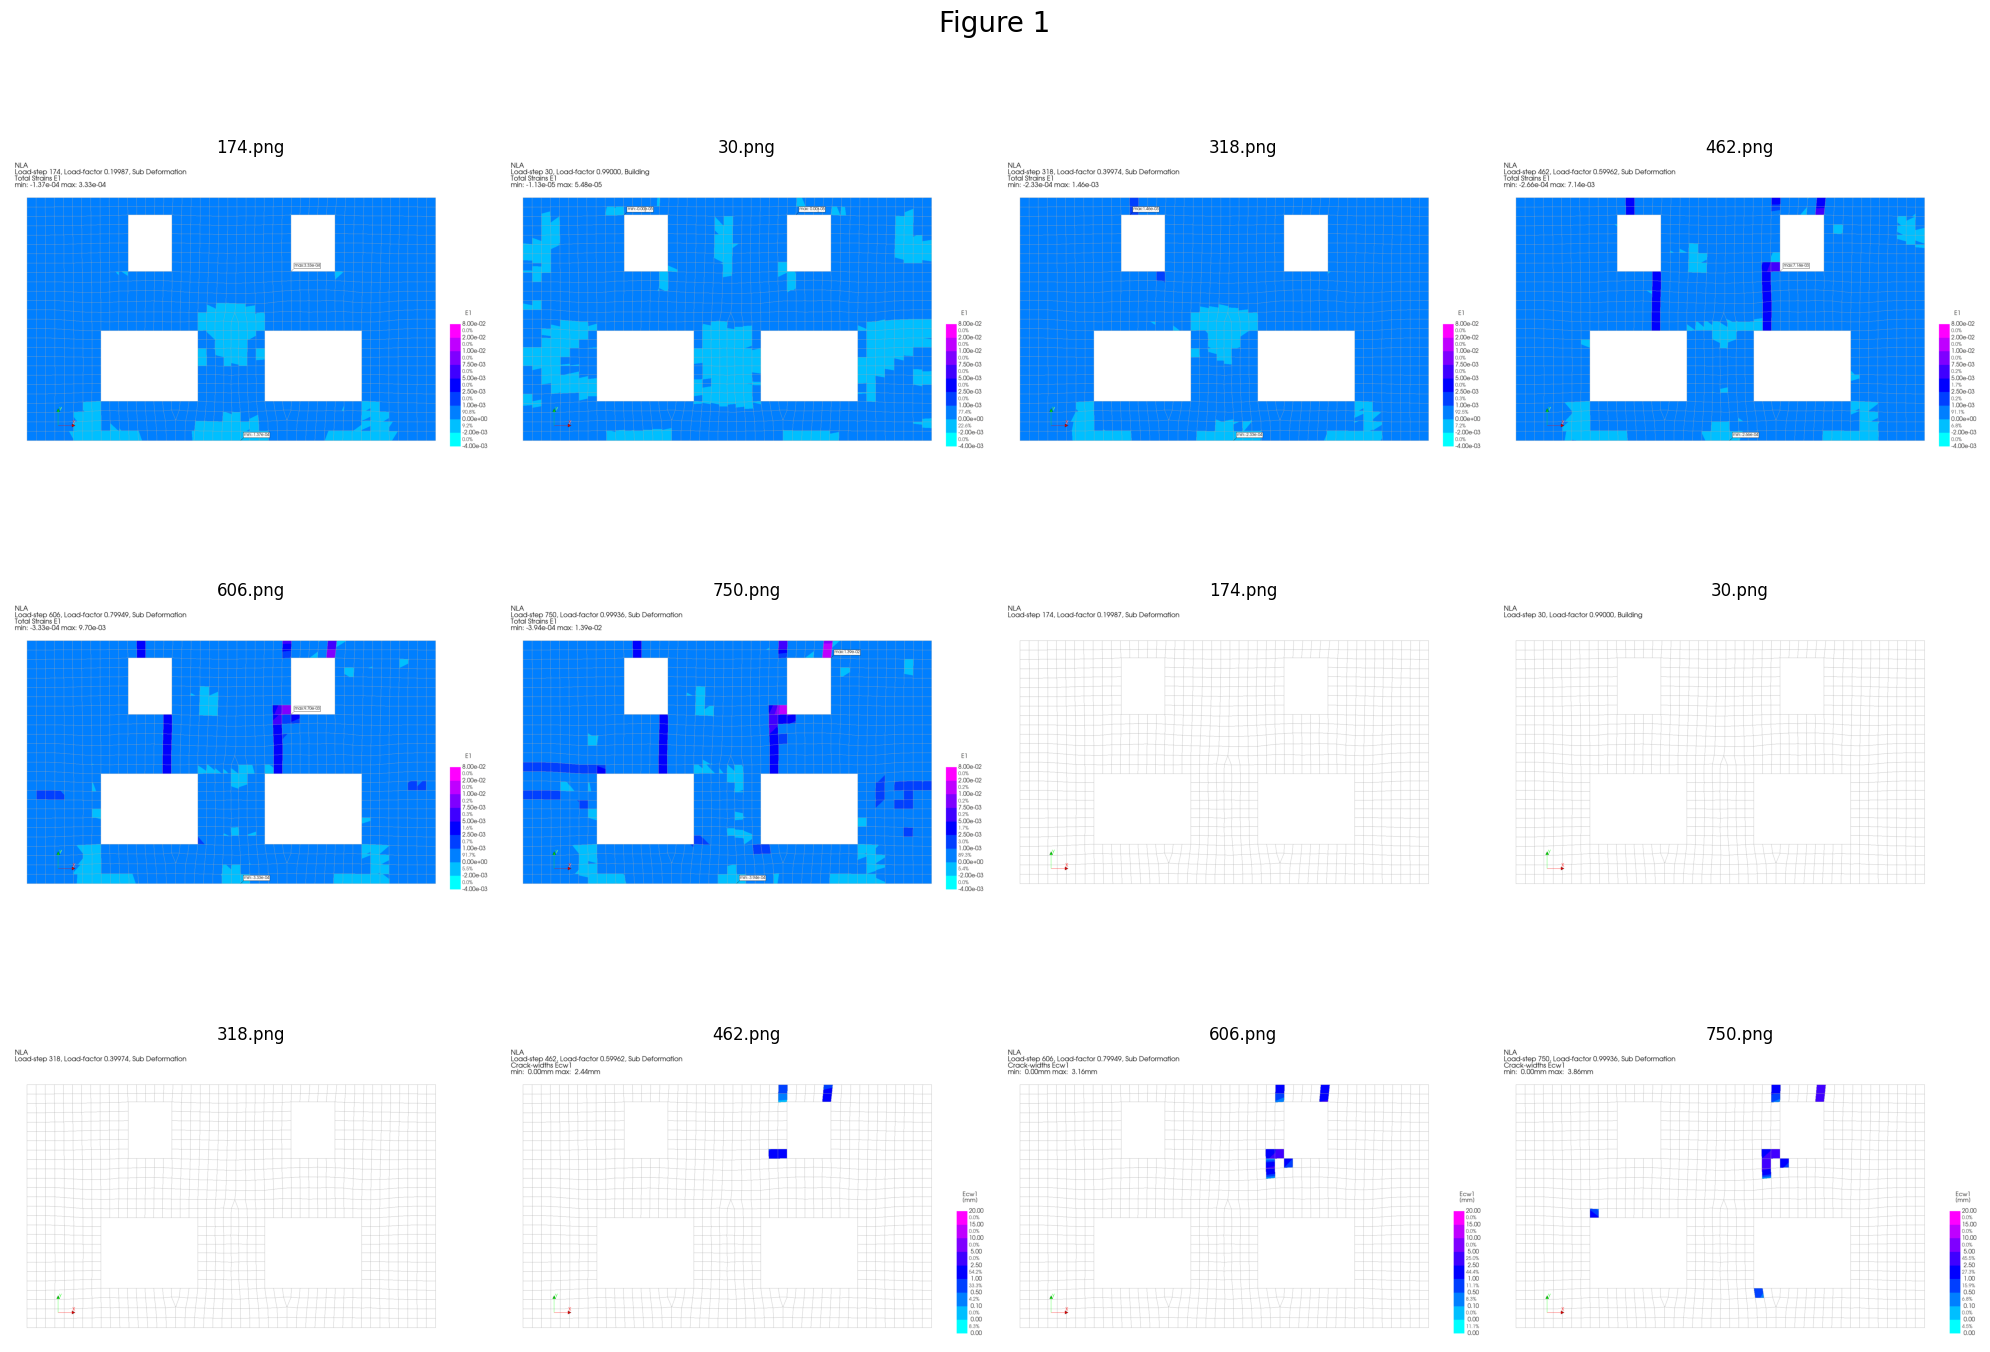

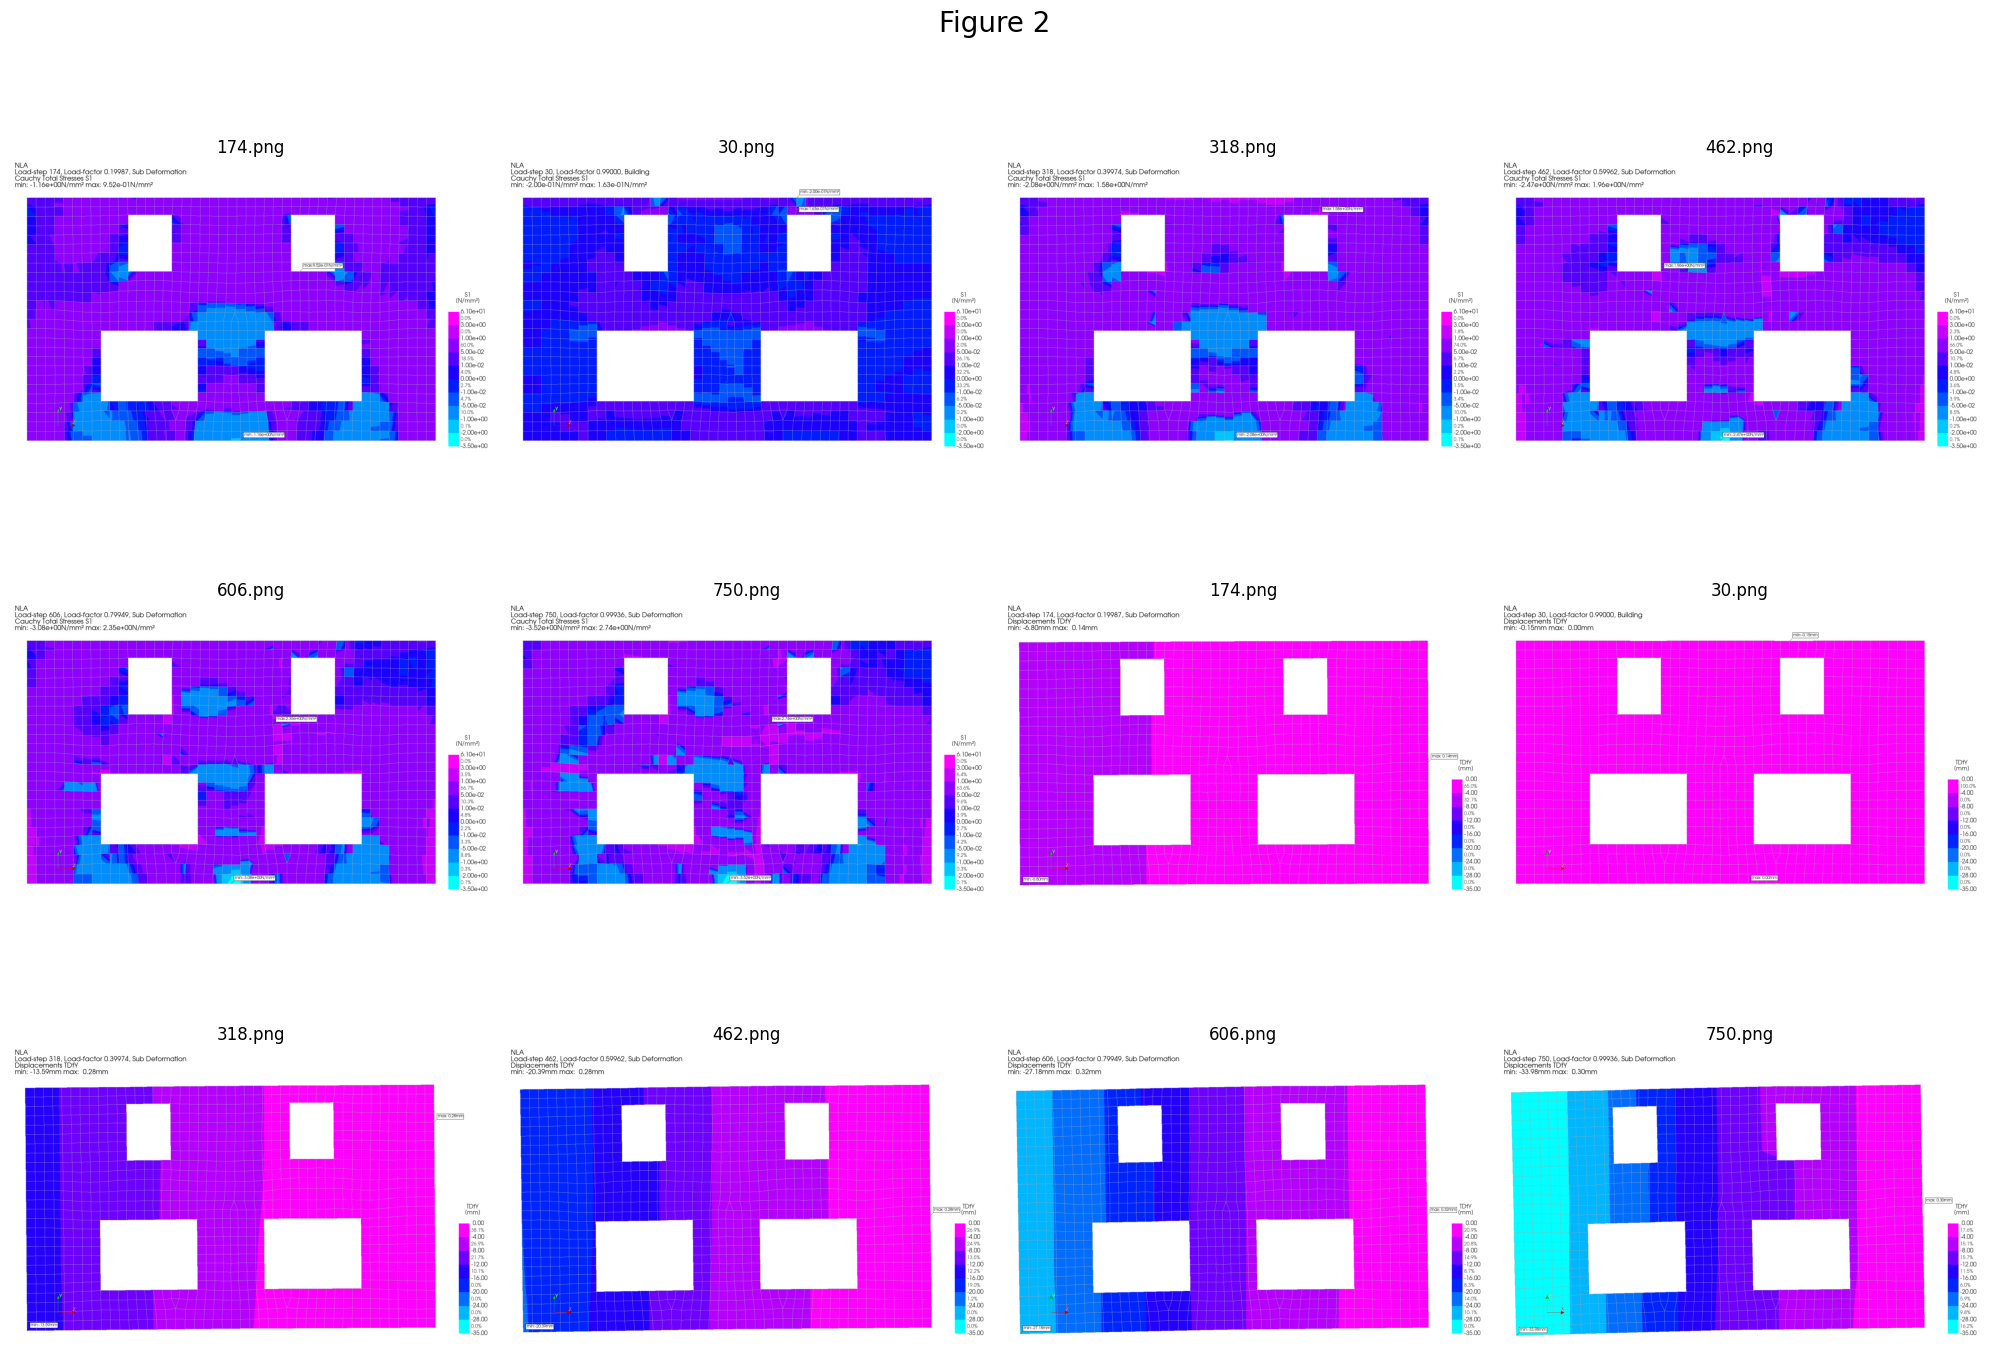

In [4]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Base path where the plot directories are located
base_path = r"C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\EMM\2D\Standard\2\Outer\2DW2O - EMHJ\plots"

# Components and their corresponding directory names
components = ['Ecw1', 'TDtY', 'E1', 'S1']

# Function to create a 3x4 grid for a subset of the images
def create_grid(figure_number, component_images):
    fig, axes = plt.subplots(3, 4, figsize=(20, 15))
    fig.suptitle(f'Figure {figure_number}', fontsize=20)
    axes = axes.flatten()  # Flatten the 2D array to easily iterate over it

    for ax, img_path in zip(axes, component_images):
        if os.path.exists(img_path):
            img = mpimg.imread(img_path)
            ax.imshow(img)
            ax.set_title(os.path.basename(img_path))
        ax.axis('off')  # Hide the axes

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

# Generate lists of image paths for each component
all_image_paths = []
for component in components:
    component_dir = os.path.join(base_path, component)
    if os.path.exists(component_dir):
        component_images = [os.path.join(component_dir, img) for img in os.listdir(component_dir) if img.endswith('.png')]
        all_image_paths.extend(component_images)

# Sort all image paths to maintain order
all_image_paths.sort()

# Split the images into two sets for two figures
split_index = len(all_image_paths) // 2
first_set = all_image_paths[:split_index]
second_set = all_image_paths[split_index:]

# Create two figures with 3x4 grids
create_grid(1, first_set)
create_grid(2, second_set)
